#**Assignment 4**

In [0]:
#imports
import matplotlib.pyplot as plt
import random as rn
import imageio
import os
import math
import numpy as np
import networkx as nx

##1st task

In [0]:
def RandomWalk(N,position_x=[0],position_y=[0],boundary_x=[-10,10],boundary_y=[-10,10]):
  '''Function generate a random walk on the lattice. It returns list of positions on axis x and list of positions on axis y.

  Keyword arguments:
  N -- number of steps
  position_x -- list with start position on x axis
  position_y -- list with start position on x axis
  boundary_x -- list with left and right border on x axis
  bundary_y -- list with left and right border on y axis
  '''
  i = 0     #iterator of steps
  while i<N:
    #each of 4 possible steps has probability p=0.25
    r = rn.random()
    if r<=.25:
      #check if location is in borders
      if position_x[-1]+1>boundary_x[1]:
        pass
      else:
        #add a new position: one step right
        position_x.append(position_x[-1]+1)
        position_y.append(position_y[-1])
        i+=1
    elif .25<r<=.5:
      #check if location is in borders
      if position_y[-1]+1>boundary_y[1]:
        pass
      else:
        #add a new position: one step up
        position_x.append(position_x[-1])
        position_y.append(position_y[-1]+1)
        i+=1
    if .5<r<=.75:
      #check if location is in borders
      if position_x[-1]-1<boundary_x[0]:
        pass
      else:
        #add a new position: one step left
        position_x.append(position_x[-1]-1)
        position_y.append(position_y[-1])
        i+=1
    elif .75<r<=1:
      #check if location is in borders
      if position_y[-1]-1<boundary_y[0]:
        pass
      else:
        #add a new position: one step down
        position_x.append(position_x[-1])
        position_y.append(position_y[-1]-1)
        i+=1
  return position_x, position_y

In [0]:
def GifGenerator(name,position_x,position_y,boundary_x=[-10,10],boundary_y=[-10,10]):
  '''Function generate a gif file.

  Keyword arguments:
  name -- name of file
  position_x -- list with start position of agent on x axis
  position_y -- list with start position of agent on x axis
  boundary_x -- list with left and right border on x axis
  bundary_y -- list with left and right border on y axis
  '''
  path = os.getcwd()  #check path
  if 'img' not in os.listdir(path):
    #create folder dor plots if it not exist
    os.mkdir(path+"/img/")
  images = [] #list for snapshot
  #prepare lattice
  plt.xlim(boundary_x[0]-1,boundary_x[1]+1)
  plt.ylim(boundary_y[0]-1,boundary_y[1]+1)
  plt.title('Random Walk')
  plt.xlabel('x')
  plt.ylabel('y')
  for i in range(1,len(position_x)):
    #draw step
    plt.plot(position_x[:i+1],position_y[:i+1],'b')
    plt.plot(position_x[:i],position_y[:i],'b.')
    plt.plot(position_x[i],position_y[i],'r.')
    #save figure in folder as "step"+number
    plt.savefig(os.path.join(path+"/img/","step{i}.png".format(i=i)))
    #add to images
    images.append(imageio.imread(path+"/img/step{i}.png".format(i=i)))
  #make a gif of images
  imageio.mimsave(name+'.gif', images,  duration = 0.8)
  return 'Gif file is saved'

'Gif file is saved'

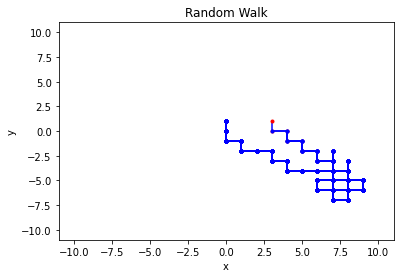

In [4]:
rw=RandomWalk(50)
GifGenerator('movie',rw[0],rw[1])

##2nd task

In [0]:
def PearsonWalk(N,position_x=[0],position_y=[0],boundary_x = [-10,10],boundary_y = [-10,10]):
  '''Function generate a Pearson random walk on the lattice. It returns the fraction of time steps when the walker is in right half plane (x > 0),
   the fraction of time the walker is in the ﬁrst quadrant of positions on axis x and list of positions on axis y.

  Keyword arguments:
  N -- number of steps
  position_x -- list with start position on x axis
  position_y -- list with start position on x axis
  boundary_x -- list with left and right border on x axis
  undary_y -- list with left and right border on y axis
  '''
  i=0
  An=0
  Bn=0
  while i<N:
    #step = 1, so delta_x=cos(phi) and delta_y=sin(phi)
    #phi is between 0 and 2*pi
    #r*2*pi gives all possible angles
    r = rn.random()
    #check if new location is in boundries
    if position_x[-1]+math.cos(r*2*math.pi)>boundary_x[1] or position_x[-1]+math.cos(r*2*math.pi)<boundary_x[0] or position_y[-1]+math.sin(r*2*math.pi)>boundary_y[1] or position_y[-1]+math.sin(r*2*math.pi)<boundary_y[0]:
        pass
    else:
        if position_x[-1]+math.cos(r*2*math.pi)>0:
          #check if agent is in right half of plane and add 1 to iterator
          An+=1
          if position_y[-1]+math.sin(r*2*math.pi)>0:
            #check if agent is in first quadrant of plane and add 1 to iterator
            Bn+=1
        #new position of agent
        position_x.append(position_x[-1]+math.cos(r*2*math.pi))
        position_y.append(position_y[-1]+math.sin(r*2*math.pi))
        i+=1
  return An/N,Bn/N,position_x,position_y


'Gif file is saved'

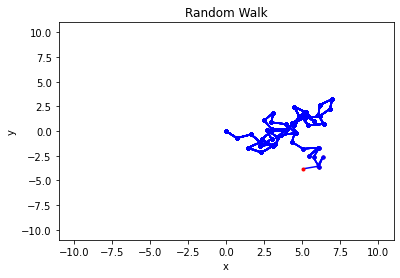

In [21]:
pw=PearsonWalk(50)
GifGenerator('movie2',pw[2],pw[3])

In [0]:
An=[]
Bn=[]
for _ in range(1000):
  An.append(PearsonWalk(1000,position_x=[0],position_y=[0],boundary_x = [-10,10],boundary_y = [-10,10])[0])
  Bn.append(PearsonWalk(1000,position_x=[0],position_y=[0],boundary_x = [-10,10],boundary_y = [-10,10])[1])

In [12]:
np.mean(An)

0.504699

In [13]:
np.mean(Bn)

0.250844

Text(0.5, 1.0, 'Density of An')

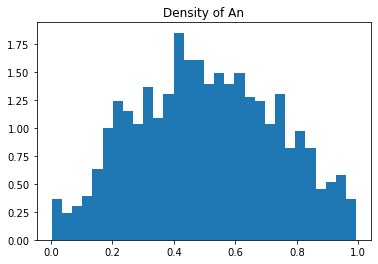

In [16]:
plt.hist(An,density=True,bins=30)
plt.title('Density of An')

Text(0.5, 1.0, 'Density of Bn')

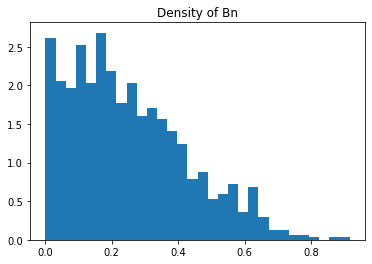

In [17]:
plt.hist(Bn,density=True,bins=30)
plt.title('Density of Bn')

##3dt task

In [0]:
def WalkOnGraph(start_node,graph,N):
  '''Function generate a random walk on the graph. It returns the list of hitting neighbors.

  Keyword arguments:
  start_node -- start position of walk
  graph -- generated graph that the walk will be simulated on
  N -- number of steps
  '''
  #list of hitting nodes with start point
  steps=[start_node]
  for i in range(N):
    #choosing neighbor of last hitted node
    steps.append(rn.choice(list(graph.neighbors(steps[-1]))))
  return steps

In [0]:
nodes=20  #number of nodes
N=20  #number of steps
#generating walks for different graphs
G1 = nx.barabasi_albert_graph(nodes,4) 
ba_walk = WalkOnGraph(0,G1,N)
G2 = nx.watts_strogatz_graph(nodes,2,.4)
ws_walk = WalkOnGraph(0,G2,N)
G3 = nx.gnp_random_graph(nodes,.4)
random_walk = WalkOnGraph(0,G3,N)

In [0]:
def GraphAnimation(G,steps,name='graph_gif'):
  '''Function generate a gif of a random walk on the graph.

  Keyword arguments:
  G -- generated graph that the walk will be simulated on
  steps -- list of steps
  name -- name of gif file
  '''
  path = os.getcwd()  #check path
  if 'graph' not in os.listdir(path):
    #create folder for plots if it not exist
    os.mkdir(path+"/graph/")
  #list of images
  images = []
  f = plt.figure()
  plt.title('Random walk on graph')
  #nodes will be randomly situated
  pos=nx.random_layout(G)
  #draw edges
  nx.draw_networkx_edges(G,pos)
  for i in steps:
    #for every step I create a list of hitted node 
    red_node = [i]
    #draw nodes
    nx.draw_networkx_nodes(G,pos,node_color='b')   
    #draw hitted node on red    
    nx.draw_networkx_nodes(G,pos,nodelist=red_node,node_color='r') 
    #save plot
    f.savefig(os.path.join(path+"/graph/","graph{i}.png".format(i=i)))
    #add to list of images
    images.append(imageio.imread(path+"/graph/graph{i}.png".format(i=i)))
  #create graph
  imageio.mimsave(name+'.gif', images,  duration = 0.8)

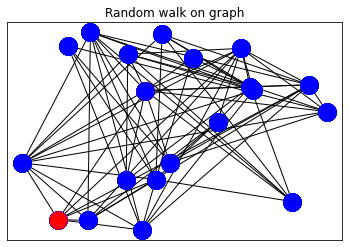

In [29]:
GraphAnimation(G3,random_walk)

In [0]:
G1 = nx.barabasi_albert_graph(15,4) 
ba_walk = WalkOnGraph(7,G1,100)
G2 = nx.watts_strogatz_graph(15,2,.4)
ws_walk = WalkOnGraph(7,G2,100)
G3 = nx.gnp_random_graph(15,.4)
random_walk = WalkOnGraph(7,G3,100)

In [0]:
def AverageHitting(number_of_nodes,start_node,graph,N,mc):
  av_hit = {}
  for i in range(number_of_nodes):
    av_hit['{i}'.format(i=i)] = 0
  for _ in range(mc):
    steps = WalkOnGraph(start_node,graph,N)
    for i in range(number_of_nodes):
      av_hit['{i}'.format(i=i)] += np.count_nonzero(np.array(steps) == i)/mc
  return av_hit

In [0]:
AverageHitting(15,7,G3,100,100)

{'0': 5.639999999999998,
 '1': 8.549999999999999,
 '10': 7.63,
 '11': 7.46,
 '12': 6.889999999999995,
 '13': 6.209999999999999,
 '14': 5.789999999999998,
 '2': 3.579999999999998,
 '3': 8.86,
 '4': 1.1000000000000005,
 '5': 6.179999999999997,
 '6': 6.999999999999998,
 '7': 13.010000000000007,
 '8': 6.349999999999999,
 '9': 6.749999999999998}

In [0]:
AverageHitting(15,7,G2,100,100)

{'0': 5.65,
 '1': 5.569999999999996,
 '10': 7.040000000000002,
 '11': 6.109999999999999,
 '12': 5.509999999999997,
 '13': 5.469999999999997,
 '14': 5.549999999999995,
 '2': 5.839999999999998,
 '3': 6.169999999999997,
 '4': 6.419999999999997,
 '5': 7.039999999999996,
 '6': 8.449999999999998,
 '7': 9.819999999999995,
 '8': 8.609999999999998,
 '9': 7.749999999999999}

In [0]:
AverageHitting(15,7,G1,100,100)

{'0': 1.0800000000000007,
 '1': 9.459999999999994,
 '10': 6.929999999999996,
 '11': 5.689999999999998,
 '12': 5.550000000000001,
 '13': 5.709999999999997,
 '14': 4.649999999999998,
 '2': 7.879999999999998,
 '3': 4.479999999999998,
 '4': 11.670000000000002,
 '5': 10.919999999999998,
 '6': 7.589999999999998,
 '7': 6.709999999999996,
 '8': 6.929999999999998,
 '9': 5.7499999999999964}